# Методы машинного обучения в рекомендательных системах

### Описание

**Цель:** создать рекомендательную систему фильмов, используя методы машинного обучения.

**Задачи:**
1) провести предобработку данных;\
2) реализовать алгоритмы рекомендательных систем, основанных на следующих подходах: demographic filtering, content-based filtering, collaborative filtering;\
3) продумать логику выдачи рекомендаций разными методами.

**Ожидаемый результат:** алгоритм, ранжирующий фильмы на основании различных признаков с целью выдачи рекомендации.

### Dataset
from: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/versions/5?resource=download

**Содержание**\
Этот набор данных состоит из следующих файлов:

**movies_metadata.csv**: Основной файл метаданных фильмов. Содержит информацию о 45 000 фильмах, включенных в полный набор данных MovieLens. Характеристики включают плакаты, задники, бюджет, выручку, даты выпуска, языки, страны-производители и компании.

**keywords.csv**: Содержит ключевые слова для сюжета фильма для наших фильмов MovieLens. Доступен в виде строкового объекта JSON.

**credits.csv**: Содержит информацию об актерском составе и съемочной группе для всех наших фильмов.

**links.csv**: файл, содержащий идентификаторы TMDB и IMDB всех фильмов, представленных в полном наборе данных MovieLens.

**links_small.csv**: Содержит идентификаторы TMDB и IMDB небольшого подмножества из 9000 фильмов из полного набора данных.

**ratings_small.csv**: Подмножество из 100 000 оценок от 700 пользователей по 9 000 фильмам.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%time
df = pd.read_csv('movies_metadata.csv')
df.head()

Wall time: 1.41 s


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
df2 = df[['genres','id','overview','popularity','production_companies','title','vote_average','vote_count']]
df2.head()

,genres,id,overview,popularity,production_companies,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",Father of the Bride Part II,5.7,173.0


In [7]:
df2.isna().sum() # проверим наличие пропусков

genres                    0
id                        0
overview                954
popularity                5
production_companies      3
title                     6
vote_average              6
vote_count                6
dtype: int64

In [8]:
df2.shape

(45466, 8)

In [9]:
# удалим пропущенные значения
df2 = df2.dropna().reset_index(drop=True)
df2.shape

(44506, 8)

**В датасете есть фильмы, информация о которых записана несколько раз** 

In [10]:
df2['id'].value_counts()>1

id
141971     True
10991      True
14788      True
97995      True
15028      True
          ...  
27583     False
6883      False
26390     False
34016     False
461257    False
Name: count, Length: 44476, dtype: bool

In [11]:
df2[df2['id']=='109962']

,genres,id,overview,popularity,production_companies,title,vote_average,vote_count
5689,"[{'id': 18, 'name': 'Drama'}]",109962,Two literary women compete for 20 years: one w...,12.180836,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",Rich and Famous,4.9,7.0
20745,"[{'id': 18, 'name': 'Drama'}]",109962,Two literary women compete for 20 years: one w...,10.396878,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",Rich and Famous,4.9,7.0


In [12]:
# оставим по одной записи о каждом фильме
df2 = df2.drop_duplicates(subset='id').reset_index(drop=True)
sum(df2['id'].value_counts()>1)

0

# Demographic Filtering

### Холодный старт

Холодный старт – это типичная ситуация, когда ещё не накоплено достаточное количество данных для корректной работы рекомендательной системы. В этой ситуации будем рекомендовать самые высокорейтинговые и самые популярные фильмы.

**Movie rating**

https://en.wikipedia.org/wiki/Shrinkage_(statistics)

https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

$$\text{Weighted Rating (WR)} = \frac{v}{v+m} \cdot R + \frac{m}{v+m} \cdot C$$
* v - количество голосов, отданных за фильм;
* m - минимальное количество голосов, необходимое для включения в таблицу;
* R - средний рейтинг фильма;
* C - среднее число голосов по всему датасету

In [13]:
%%time
C = df2['vote_average'].mean()
print(f'Среднее число голосов = {C}')

m = df2['vote_count'].quantile(0.9)
print(f'У фильма должно быть хотя бы m = {m} оценок')

# отберем фильмы, удовлетворяющие условию
high_rated_films = df2.copy()[df2['vote_count'] >= m]
print(f'Количество фильмов = {high_rated_films.shape[0]}')

Среднее число голосов = 5.639018796654375
У фильма должно быть хотя бы m = 165.0 оценок
Количество фильмов = 4458
Wall time: 16.6 ms


Отобрано 4458 фильмов с достаточным количеством голосов

In [14]:
# функция, рассчитывающая взвешеный рейтинг (WR)
def weighted_rating(x, m, C): 
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
%%time
high_rated_films['WR'] = high_rated_films.apply(weighted_rating, axis=1, args=(m,C))
high_rated_films.head()

Wall time: 109 ms


,genres,id,overview,popularity,production_companies,title,vote_average,vote_count,WR
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story,7.7,5415.0,7.639057
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji,6.9,2413.0,6.819293
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",Father of the Bride Part II,5.7,173.0,5.670231
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",Heat,7.7,1886.0,7.534197
8,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",Sudden Death,5.5,174.0,5.567664


### Рекомендация самых высокооцененных фильмов

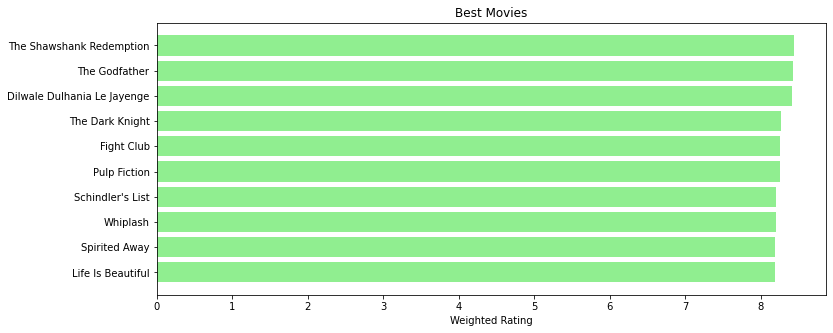

Wall time: 472 ms


In [16]:
%%time

# сортировка фильмов по убыванию score
high_rated_films = high_rated_films.sort_values('WR', ascending=False)

# топ-10 самых высокооцененных фильмов
top_highest_rated = high_rated_films[['title', 'vote_count', 'vote_average', 'WR']].head(10)

plt.figure(figsize=(12,5))

plt.barh(top_highest_rated['title'], 
         top_highest_rated['WR'].head(10),
         color='lightgreen'
)

plt.gca().invert_yaxis()
plt.xlabel("Weighted Rating")
plt.title("Best Movies")
plt.show()

### Рекомендация самых популярных фильмов

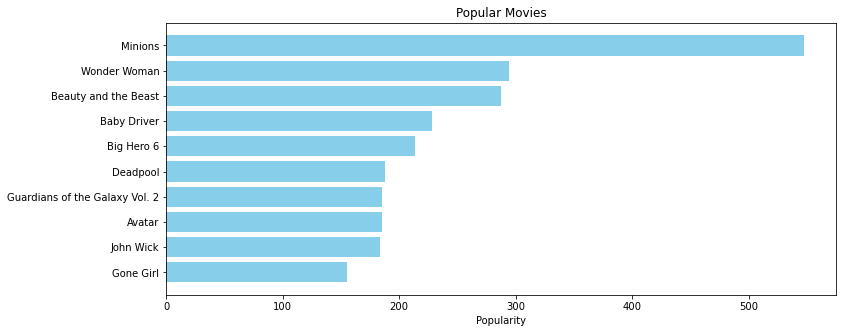

Wall time: 370 ms


In [17]:
%%time

df2['popularity'] = df2['popularity'].astype('float64')

popular_movies = df2.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,5))

plt.barh(popular_movies['title'].head(10), 
         popular_movies['popularity'].head(10),
         color='skyblue'
)

plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

# Content-Based Filtering

**Для заданного фильма найдем похожие на него по описанию**

In [18]:
df2['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
44471          Rising and falling between a man and woman.
44472    An artist struggles to finish his work while a...
44473    When one of her hits goes wrong, a professiona...
44474    In a small town live two brothers, one a minis...
44475    50 years after decriminalisation of homosexual...
Name: overview, Length: 44476, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
%%time
tfidf = TfidfVectorizer(stop_words='english')
# создание TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

Wall time: 4.79 s


(44476, 75827)

In [21]:
# создадим series, в которой индексы - названия фильмов
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

### Создание рекомендации на основе сходства описаний фильмов

**1. Cosine similarity**

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

$$\text{similarity}(x,y) = \frac{xy^T}{\Vert x \Vert \Vert y \Vert}$$

In [23]:
def get_recommendations_overview_cossim(title):
    
    # находим индекс фильма по title
    idx = indices[title]
    
    # рассчитываем косинусное расстояние для конкретного фильма и всех остальных
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)[0]
    
    # сортируем
    sorted_cosine_sim = cosine_sim.argsort()

    # выводим 10 наиболее похожих фильмов
    return df2['title'].iloc[sorted_cosine_sim[-11:-1]]

In [24]:
%%time
get_recommendations_overview_cossim('The Shawshank Redemption')

Wall time: 80.9 ms


40783                           Alcatraz Island
9196     Female Prisoner Scorpion: Jailhouse 41
33663                   Women's Prison Massacre
9361                                    In Hell
17342                           Girls in Prison
36063                            Women's Prison
11292                               Brute Force
38404                         Seven Times Seven
6523                                Civil Brand
16858                   They Made Me a Fugitive
Name: title, dtype: object

In [25]:
%%time
get_recommendations_overview_cossim('Fight Club')

Wall time: 76.5 ms


12458               Dead Awake
35440             Frankenstein
5315                   Perfect
29873               Freerunner
28123                    Julia
22704                  In Fear
23739           Make Your Move
5181                 Delirious
31390           Unknown Caller
15388    9/11: The Twin Towers
Name: title, dtype: object

**2. KMeans**

In [26]:
from sklearn.cluster import KMeans

In [27]:
%%time

# отберем строки tfidf_matrix, соответсвующие фильмам с наибольшим рейтингом
tfidf_matrix_for_KMeans = tfidf_matrix[high_rated_films.index]
tfidf_matrix_for_KMeans.shape

Wall time: 3 ms


(4458, 75827)

In [28]:
4458 / 300

14.86

In [29]:
%%time
# обучим модель, чтобы она кластерзовала фильмы по их описаниям
kmeans = KMeans(n_clusters=300, random_state=0, n_init="auto").fit(tfidf_matrix_for_KMeans)
clustered_movies = kmeans.labels_

clustered_movies[:10]

Wall time: 13.5 s


array([268, 233, 117,   5,  32, 243, 218, 203, 218, 281])

In [30]:
def get_recommendations_overview_KMeans(title):
    
    # находим индекс фильма по title
    df_t = high_rated_films.reset_index(drop=True)
    idx = (df_t[df_t['title']==title]).index[0]
    
    # получаем названия наиболее похожих фильмов
    recommendation = high_rated_films['title'].iloc[clustered_movies==clustered_movies[idx]]

    return recommendation

In [31]:
%%time
get_recommendations_overview_KMeans('The Shawshank Redemption')

Wall time: 6.07 ms


312      The Shawshank Redemption
28212              McFarland, USA
257             A Little Princess
979                 Cool Runnings
4716              The Last Castle
11174                  Invincible
11428             We Are Marshall
10063            The Longest Yard
6056         Bend It Like Beckham
2203                 The Waterboy
9792                 Ice Princess
Name: title, dtype: object

In [32]:
%%time
get_recommendations_overview_KMeans('Fight Club')

Wall time: 5.56 ms


2824                                  Fight Club
1187                          Dead Poets Society
12981                                   The Wave
9425                                  The Chorus
11772                            This Is England
7320                                 Le Samouraï
31127                 I Can Quit Whenever I Want
22155                            Fuck You Goethe
16883                                Melancholia
18659                                 Detachment
804                                      Matilda
6689                              School of Rock
27374                                   The DUFF
20503                               In the House
3312                Guess Who's Coming to Dinner
15739                                     Easy A
4751                        The Devil's Backbone
15973                Undisputed III : Redemption
8221                               Bad Education
11275                               The Guardian
11446               

### Используя жанры, ключевые слова, состав актеров и режиссеров

In [33]:
%%time
df_keywords = pd.read_csv('keywords.csv', dtype={'id': 'object'})
df_credits = pd.read_csv('credits.csv', dtype={'id': 'object'})

df_keywords.shape, df_credits.shape

Wall time: 5.2 s


((46419, 2), (45476, 3))

**Дополним датасет дополнительной информацей о фильме**

In [34]:
%%time
df2 = df2.merge(df_keywords, on='id')
df2 = df2.merge(df_credits, on='id')
df2.head()

Wall time: 136 ms


,genres,id,overview,popularity,production_companies,title,vote_average,vote_count,keywords,cast,crew
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [35]:
# проверим наличие пропусков
df2.isna().sum().sum()

0

In [36]:
sum(df2['id'].value_counts()>1)

957

In [37]:
df2 = df2.drop_duplicates(subset='id').reset_index(drop=True)
sum(df2['id'].value_counts()>1)

0

In [38]:
df2.shape

(44475, 11)

**Некоторые признаки записаны в виде строк вида '[{}, {}]', их нужно преобразовать к списку словарей**

In [39]:
%%file conver_strlist.py
from ast import literal_eval
def conver_strlist(dff):
    # получим список жанров
    dff['genres'] = dff['genres'].apply(literal_eval).apply(lambda x: [i['name'] for i in x])

    # получим список компаний
    dff['production_companies'] = dff['production_companies'].apply(literal_eval).apply(lambda x: [i['name'] for i in x])

    # получим список ключевых слов
    dff['keywords'] = dff['keywords'].apply(literal_eval).apply(lambda x: [i['name'] for i in x])

    # получим список актеров
    dff['cast'] = dff['cast'].apply(literal_eval).apply(lambda x: [i['name'] for i in x])

    # получим список режиссеров
    dff['crew'] = dff['crew'].apply(literal_eval).apply(lambda x: [i['name'] for i in x if i['job']=='Director'])
    
    return dff

Overwriting conver_strlist.py


In [40]:
from ast import literal_eval
import multiprocessing
from conver_strlist import conver_strlist

In [41]:
%%time
num_cores = multiprocessing.cpu_count()
df2_split = np.array_split(df2, num_cores, axis=0)

with multiprocessing.Pool(processes=num_cores) as pool:
    df_extra_info = pd.concat(pool.map(conver_strlist, df2_split))
    
df_extra_info.head()

Wall time: 14.7 s


,genres,id,overview,popularity,production_companies,title,vote_average,vote_count,keywords,cast,crew
0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],Toy Story,7.7,5415.0,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",Jumanji,6.9,2413.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",Grumpier Old Men,6.5,92.0,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],Waiting to Exhale,6.1,34.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",Father of the Bride Part II,5.7,173.0,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


**Преобразуем данные:**
* приведем слова к нижнему регистру
* удалим пробелы, чтобы различать разных людей с одним именем, например, Tom Hardy и Tom Cruise**

In [47]:
%%file convert_low_nospace.py
def convert_low_nospace(dff):
    features = ['title', 'genres','production_companies','keywords','crew']
    
    for feature in features[1:]:
        dff[feature] = dff[feature].apply(
            lambda x: [i.replace(" ", "").lower() for i in x]
        )
    
    return dff[features]

Overwriting convert_low_nospace.py


In [48]:
from convert_low_nospace import convert_low_nospace

In [49]:
%%time
num_cores = multiprocessing.cpu_count()
df_extra_info_split = np.array_split(df_extra_info, num_cores, axis=0)

with multiprocessing.Pool(processes=num_cores) as pool:
    df_with_cast = pd.concat(pool.map(convert_low_nospace, df_extra_info_split))
    
df_with_cast.head()

Wall time: 2.96 s


,title,genres,production_companies,keywords,crew
0,Toy Story,"[animation, comedy, family]",[pixaranimationstudios],"[jealousy, toy, boy, friendship, friends, riva...",[johnlasseter]
1,Jumanji,"[adventure, fantasy, family]","[tristarpictures, teitlerfilm, interscopecommu...","[boardgame, disappearance, basedonchildren'sbo...",[joejohnston]
2,Grumpier Old Men,"[romance, comedy]","[warnerbros., lancastergate]","[fishing, bestfriend, duringcreditsstinger, ol...",[howarddeutch]
3,Waiting to Exhale,"[comedy, drama, romance]",[twentiethcenturyfoxfilmcorporation],"[basedonnovel, interracialrelationship, single...",[forestwhitaker]
4,Father of the Bride Part II,[comedy],"[sandollarproductions, touchstonepictures]","[baby, midlifecrisis, confidence, aging, daugh...",[charlesshyer]


**Получим текстовую строку с информацией**

In [50]:
%%time
soup = df_with_cast['genres'].copy()
for i in features[1:]:
    soup += df_with_cast[i].copy()
soup = soup.apply(lambda x: ' '.join(x))
soup

Wall time: 503 ms


0        animation comedy family pixaranimationstudios ...
1        adventure fantasy family tristarpictures teitl...
2        romance comedy warnerbros. lancastergate fishi...
3        comedy drama romance twentiethcenturyfoxfilmco...
4        comedy sandollarproductions touchstonepictures...
                               ...                        
44470              drama family tragiclove hamidnematollah
44471           drama sineolivia artist play pinoy lavdiaz
44472    action drama thriller americanworldpictures ma...
44473                            yermoliev yakovprotazanov
44474                                         daisyasquith
Name: genres, Length: 44475, dtype: object

**Создание рекомендации на основе сходства жанров, ключевых слов, состава команды**

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
CntVctr = CountVectorizer(stop_words='english')
count_matrix = CntVctr.fit_transform(soup)

In [63]:
def get_recommendations_cast_cossim(title):
    idx = indices[title]
    
    # Получаем косинусное расстояние для конкретного фильма и всех остальных
    cosine_sim = cosine_similarity(count_matrix[idx], count_matrix)

    sorted_cosine_sim = cosine_sim.argsort(axis=1)[0]

    recommendation = sorted_cosine_sim[-11:-1]

    return df2['title'].iloc[recommendation]

In [64]:
%%time
get_recommendations_cast_cossim('The Shawshank Redemption')

Wall time: 22 ms


14788                   Caged
38875      Lights of New York
11894                     McQ
26560               Juke Girl
25700           Lady Gangster
43303    High School Big Shot
27676      The Strange Affair
28242               Unchained
23910    Castle on the Hudson
33928    Duffy of San Quentin
Name: title, dtype: object

In [65]:
%%time
get_recommendations_cast_cossim('Fight Club')

Wall time: 20.3 ms


4933                The Five Heartbeats
13007    I Can Get it For You Wholesale
2465                        Pushing Tin
2915                  Anywhere But Here
11321                            Flicka
24238                        Blue Denim
17417               Tender Is the Night
18606                Satan Never Sleeps
16475        Phone Call from a Stranger
25886                   Three Brave Men
Name: title, dtype: object

In [58]:
from sklearn.cluster import MiniBatchKMeans

In [71]:
%%time
kmb = MiniBatchKMeans(n_clusters=1000, random_state=0, n_init="auto").fit(count_matrix)
clustered_movies_kmb = kmb.labels_

clustered_movies_kmb[:10]

Wall time: 25.8 s


array([721, 990,   4,  32, 627,  27, 781, 685, 163, 163])

In [72]:
def get_recommendations_cast_MiniBatchKMeans(title):
    
    # находим индекс фильма по title
    idx = indices[title]
    
    particular_cluster = clustered_movies_kmb[idx]
    # получаем названия наиболее похожих фильмов
    recommendation = df2['title'].iloc[clustered_movies_kmb==particular_cluster]

    return recommendation

In [73]:
%%time
get_recommendations_cast_MiniBatchKMeans('The Shawshank Redemption')

Wall time: 4 ms


15                                        Casino
29                                Shanghai Triad
30                               Dangerous Minds
40                               Dead Presidents
79       Things to Do in Denver When You're Dead
                          ...                   
43847                             Secret Defense
43977                             The Wrong Road
43981                          One Hundred Steps
44060                   G:MT Greenwich Mean Time
44072                                Junction 48
Name: title, Length: 855, dtype: object

In [74]:
%%time
get_recommendations_cast_MiniBatchKMeans('Fight Club')

Wall time: 1.56 ms


25                          Othello
883                Sunset Boulevard
887                   All About Eve
889                         Rebecca
1809        How Green Was My Valley
                    ...            
34762             The Man I Married
35323                 Woman's World
35640             The Young Messiah
36865    The Truth About Bebe Donge
38663                   Night Train
Name: title, Length: 139, dtype: object

# Collaborative Filtering

https://surprise.readthedocs.io/en/stable/getting_started.html#getting-started

**Коллаборативная фильтрация** (англ. **collaborative filtering**) — это один из методов построения прогнозов в рекомендательных системах, использующий известные предпочтения (оценки) группы пользователей для предсказывания неизвестных предпочтений другого пользователя. Его основное допущение состоит в следующем: те, кто одинаково оценивал какие-либо предметы в прошлом, склонны давать похожие оценки другим предметам и в будущем.

In [75]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

## SVD

In [76]:
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

**Подберем оптимальные гиперпараметры для модели SVD**

In [79]:
%%time
param_grid = {"n_epochs": [20, 30, 40], "lr_all": [0.005, 0.01, 1], "reg_all": [0.02, 0.4, 1]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9013202269066788
{'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.4}
Wall time: 7min 23s


In [212]:
%%time
algo = SVD(n_epochs=40, lr_all=0.005, reg_all=0.4)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9011
0.9011322752622644
MAE:  0.6997
0.6996578484112456
Wall time: 7.4 s


**Судя по MAE, при прогнозировании оценки фильма модель ошибается в среднем на 0.6997, то есть меньше, чем на балл - довально хороший результат.**

In [85]:
df_pred_svd = pd.DataFrame(predictions).drop('details', axis=1)
df_pred_svd.sample(5)

,uid,iid,r_ui,est
21774,22,8950,4.0,3.646226
19591,105,2916,4.0,3.422974
8016,384,31685,3.0,3.148068
15011,472,2285,4.0,3.440291
16441,102,58,4.0,3.921006


### Изобразим предсказание для некоторых пользователей

In [202]:
def visualize_test_user(user_id):
    user_for_vis = list(
        filter(
            lambda x: x[0]==user_id,
            testset
        )
    )

    x = list(map(lambda x: x[2], user_for_vis))
    y = [algo.predict(*i)[3] for i in user_for_vis]

    plt.figure(figsize=(10,4))
    plt.title(f'Comparing values with predictions, user = {user_id}')
    plt.plot(range(len(x)), x, label='true')
    plt.plot(range(len(x)),y, c='r', label="predicted")
    plt.legend()
    plt.grid()

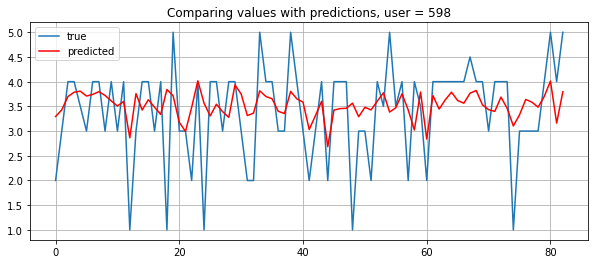

In [210]:
visualize_test_user(598)

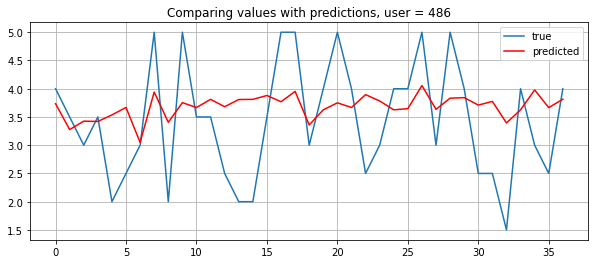

In [211]:
visualize_test_user(486)

### Пример рекомендации

In [86]:
# возьмем 3 пользователей и предскажем их оценку определенных фильмов
example_svd = testset[:5] # (user_id, item_id, movie_rating_by_user)
pd.DataFrame([algo.predict(*example_svd[i]) for i in range(5)]).drop('details', axis=1)

,uid,iid,r_ui,est
0,31,527,5.0,4.332079
1,598,4310,2.0,3.165126
2,529,2716,4.0,3.595869
3,486,2716,4.0,3.771479
4,624,7153,4.5,3.509867


**Будем рекомендовать фильм пользователю в случае, если предсказанная оценка этого фильма выше 60% оценок фильмов, которые нам известны**

In [158]:
# df, содержащий оцененные пользователем 340 фильмы, кроме фильма 4993
user_example = ratings[(ratings['userId']==340)&(ratings['movieId']!=4993)]
display(user_example.head())

real_rating_exam = ratings[(ratings['userId']==340)&(ratings['movieId']==4993)]
print('real WR =', real_rating_exam.values[0][2])

# найдем 0.6-квантиль оценок пользователя 340
quan_exam = user_example['rating'].quantile(0.6)
print(f'0.6-quantile = {quan_exam}')

est_rating_exam = algo.predict(*real_rating_exam.values[0][:-1])[3]
print(f'est_rating = {est_rating_exam}')

# решим, рекомендовать фильм 4993 или нет
print('YES') if est_rating_exam>=quan_exam else print('NO')

,userId,movieId,rating,timestamp
46419,340,6,4.0,1410374053
46420,340,47,5.0,1410374238
46421,340,293,4.0,1410374113
46422,340,296,3.5,1410374199
46423,340,318,5.0,1410252785


real WR = 5.0
0.6-quantile = 4.0
est_rating = 4.060067224790942
YES


**В данном случае алогоритм верно решил рекомендовать. Пояснение:**
1. 60% фильмов, которые этот пользователь оценивал, получили рейтинг 4 и ниже;
2. пользователь оценил данный фильм на 5, значит, фильм понравился и его следует рекомендовать;
3. модель предсказала оценку 4.06, что выше 0.6-квантиля, так что она правильно рекомендует этот фильм

In [148]:
# df, содержащий оцененные пользователем 598 фильмы, кроме фильма 4310
user_example = ratings[(ratings['userId']==598)&(ratings['movieId']!=4310)]
display(user_example)

real_rating_exam = ratings[(ratings['userId']==598)&(ratings['movieId']==4310)]
print('real WR =', real_rating_exam.values[0][2])

# найдем 0.6-квантиль оценок пользователя 598
quan_exam = user_example['rating'].quantile(0.6)
print(f'0.6-quantile = {quan_exam}')

est_rating_exam = algo.predict(*real_rating_exam.values[0][:-1])[3]
print(f'est_rating = {est_rating_exam}')

# решим, рекомендовать фильм 4310 или нет
print('YES') if est_rating_exam>=quan_exam else print('NO')

,userId,movieId,rating,timestamp
90016,598,1,4.5,1057554797
90017,598,11,4.0,1008571467
90018,598,15,2.0,1007344372
90019,598,17,2.0,1009415293
90020,598,39,3.0,1008571296
...,...,...,...,...
90323,598,6377,4.5,1057554688
90324,598,6461,3.5,1057555106
90325,598,6534,2.0,1057554710
90326,598,6537,4.0,1057555152


real WR = 2.0
0.6-quantile = 4.0
est_rating = 3.165126494590933
NO


**В данном случае алогоритм верно решил не рекомендовать этот фильм**

### SVD recommendation

In [111]:
high_rated_films.head()

,genres,id,overview,popularity,production_companies,title,vote_average,vote_count,WR
312,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",278,Framed in the 1940s for the double murder of h...,51.645403,"[{'name': 'Castle Rock Entertainment', 'id': 9...",The Shawshank Redemption,8.5,8358.0,8.444613
823,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",238,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",The Godfather,8.5,6024.0,8.423726
10276,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",19404,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,"[{'name': 'Yash Raj Films', 'id': 1569}]",Dilwale Dulhania Le Jayenge,9.1,661.0,8.408642
12443,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",155,Batman raises the stakes in his war on crime. ...,123.167259,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...",The Dark Knight,8.3,12269.0,8.264689
2824,"[{'id': 18, 'name': 'Drama'}]",550,A ticking-time-bomb insomniac and a slippery s...,63.869599,[{'name': 'Twentieth Century Fox Film Corporat...,Fight Club,8.3,9678.0,8.255393


In [113]:
high_rated_films_svd = high_rated_films.astype({'id':'float64'})
high_rated_films_svd.shape

(4458, 9)

In [114]:
links = pd.read_csv('links_small.csv').dropna()
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [115]:
best_movies_links = links.merge(high_rated_films_svd[['id', 'title', 'WR']], left_on='tmdbId', right_on='id').sort_values('WR', ascending=False)
best_movies_links_arr = best_movies_links.values
best_movies_links

,movieId,imdbId,tmdbId,id,title,WR
99,318,111161,278.0,278.0,The Shawshank Redemption,8.444613
226,858,68646,238.0,238.0,The Godfather,8.423726
2266,58559,468569,155.0,155.0,The Dark Knight,8.264689
899,2959,137523,550.0,550.0,Fight Club,8.255393
89,296,110912,680.0,680.0,Pulp Fiction,8.250304
...,...,...,...,...,...,...
3079,103596,2724064,205321.0,205321.0,Sharknado,4.267547
2321,61348,1213644,13805.0,13805.0,Disaster Movie,4.109489
1047,3593,185183,5491.0,5491.0,Battlefield Earth,4.026977
2095,50798,799949,9760.0,9760.0,Epic Movie,4.006489


In [116]:
%%time
data_svd_rec = data.build_full_trainset()

svd_complete = SVD(n_epochs=40, lr_all=0.005, reg_all=0.4)
svd_complete.fit(data_svd_rec);

Wall time: 9.72 s


In [143]:
def get_recommendation_collaborative_svd(user_id, alpha=0.6):
    df_ru = ratings[(ratings['userId']==user_id)]
    watched_movies = df_ru['movieId'].values
    quan = df_ru['rating'].quantile(alpha)
    
    c = 0
    rec = [] # список рекомендованных фильмов
    for i in best_movies_links_arr:
        # не рекомендуем фильм, если пользователь его уже смотреть
        if i[0] in watched_movies:
            continue
            
        movie_id = i[0]
        movie_WR = i[5]
        est_r = svd_complete.predict(user_id, movie_id, movie_WR)[3]
        if est_r >= quan:
            c += 1
            rec.append(i[4]) # добавляем фильм в список, если предсказанная оценка > 0.6-квантиля
            if c >= 100:
                #np.random.shuffle(rec)
                return rec
    
    if len(rec) < 20:
        rec = get_recommendation_collaborative_svd(user_id, alpha=alpha-0.1)
    #np.random.shuffle(rec)
    return rec

In [144]:
%%time
# получаем рекомендацию
get_recommendation_collaborative_svd(119)

Wall time: 39.2 ms


['Psycho',
 "Howl's Moving Castle",
 'Memento',
 'City of God',
 'The Departed',
 'My Neighbor Totoro',
 'Once Upon a Time in the West',
 'Modern Times',
 'There Will Be Blood',
 'Paths of Glory',
 'Paperman',
 'Rush',
 "Hachi: A Dog's Tale",
 "Singin' in the Rain",
 'Captain Phillips',
 'Raging Bull',
 'M',
 'Wild Tales',
 'The Kid',
 'The Third Man',
 'On the Waterfront',
 'Yojimbo',
 'Ran',
 'Amores perros',
 'A Trip to the Moon',
 "All the President's Men",
 'The Fighter',
 'The General',
 'Rebecca',
 'Philomena',
 'Ikiru',
 'Strangers on a Train',
 'In the Name of the Father',
 'Love Me If You Dare',
 'A Prophet',
 'It Happened One Night',
 'Paris, Texas',
 'The Conversation',
 'The Warriors',
 'Run Lola Run',
 'Diabolique',
 'Tell No One',
 'The Philadelphia Story',
 'Blood Simple',
 'Shadow of a Doubt',
 'Aguirre: The Wrath of God',
 'The Killer',
 'Happiness',
 'His Girl Friday',
 'The Sea Inside',
 'The Producers',
 'Drunken Master',
 'Swingers']

# Заключение

В ходе курсовой работы мной были реализованы следующие подходы:
* **Demographic Filtering**, рекомендующий лучшие фильмы по рейтингу или популярности (неперсонализированная рекомендация)

* **Content-based filtering**, находящий похожие по описанию или составу актеров/режиссеров фильмы. Можно использовать как отдельную функцию: если пользователю понравился сюжет или каст фильма, он может найти похожие фильмы. Реализовано через *косинусное расстояние*, *KMeans* и *MiniBatchKMeans*.

* **Collaborative filtering**. Имеются данные об оценках пользователей разных фильмов (user_id, movie_id, rating). Модель находит пользователей со схожими вкусами и рекомендуюет фильмы, которые оценил один, но не оценил другой. Например: [(user_1, "Avatar", 8), (user_2, "Avatar", 8.5), (user_1, "Fight Club", 9)], в данном случае пользователю user_2 будет предложен к просмотру "Fight Club". Реализовано с помощью алгоритма *SVD* из библиотеки surprise.

При первых входах пользователя в систему, ему будет предложен список фильмов, сформированный на основе **demographic filtering**. Клиент может посмотреть некоторые из этих кинокартин и оценить их или сразу присвоить рейтинг фильмам, которые он уже смотрел. Полученная информация о предпочтениях конкретного пользователя будет использоваться для персональной рекомендации при помощи подходов **collaborative filtering** и **content-based filtering**.

Также в системе будет функция поиска похожих фильмов: это идея дополнительного использования 2 подхода (**content-based filtering**). Пользователь сможет явно задать интересующий его фильм, например, "Fight Club", и система порекомендует похожие.